In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import corner
import copy
import pickle
from astropy.io import ascii

%matplotlib inline

## Definitions of fields can be found at:
### confirmed planets:
https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html
### KOIs:
https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

In [12]:
KOIs = ascii.read("../KOIs_chen2018_goodSystems_incJupiters.csv")
print(KOIs)
print(len(KOIs.colnames))
print(KOIs.colnames)

 kepid   kepoi_name kepler_name  ...    koi_pmass_err1      koi_pmass_err2  
-------- ---------- ------------ ... ------------------- -------------------
10797460  K00752.01 Kepler-227 b ...   5.261814592254313  2.8703783039770117
10797460  K00752.02 Kepler-227 c ...  6.7785302895640065   3.923334976334421
10811496  K00753.01           -- ...   19.08588364750736  19.177135554994862
10854555  K00755.01 Kepler-664 b ...   9.498445997580454  4.8713861600863515
10872983  K00756.01 Kepler-228 d ...  19.406068501847614   9.498445997580454
10872983  K00756.02 Kepler-228 c ...  10.184449523887755   4.737521184231295
10872983  K00756.03 Kepler-228 b ...   3.862509973625066  1.8110862723308965
10910878  K00757.01 Kepler-229 c ...   23.10230908649195    12.3348973880334
11446443  K00001.01   Kepler-1 b ...  12218.949453567724  1371.0969835108908
10666592  K00002.01   Kepler-2 b ...   31468.11475482906   721.4265728875714
     ...        ...          ... ...                 ...                 ...

In [13]:
print(np.max(np.array(KOIs['koi_period'])))

1693.6636225


In [14]:
print(len(np.array(KOIs['kepid'])))
print(len(np.unique(np.array(KOIs['kepid']))))

print(len(np.array(KOIs['koi_prad'])[~np.isnan(KOIs["koi_prad"])]))
print(len(np.array(KOIs['koi_ror'])[~np.isnan(KOIs["koi_ror"])]))
print(len(np.array(KOIs['koi_insol'])[~np.isnan(KOIs["koi_insol"])]))

print(len(np.array(KOIs['koi_prad_err1'])[~np.isnan(KOIs["koi_prad_err1"])]))
print(len(np.array(KOIs['koi_prad_err2'])[~np.isnan(KOIs["koi_prad_err2"])]))
print(len(np.array(KOIs['koi_period_err1'])[~np.isnan(KOIs["koi_period_err1"])]))
print(len(np.array(KOIs['koi_period_err2'])[~np.isnan(KOIs["koi_period_err2"])]))
print(len(np.array(KOIs['koi_steff_err1'])[~np.isnan(KOIs["koi_steff_err1"])]))
print(len(np.array(KOIs['koi_steff_err2'])[~np.isnan(KOIs["koi_steff_err2"])]))
print(len(np.array(KOIs['koi_slogg_err1'])[~np.isnan(KOIs["koi_slogg_err1"])]))
print(len(np.array(KOIs['koi_slogg_err2'])[~np.isnan(KOIs["koi_slogg_err2"])]))

4286
3277
4286
4286
4286
4286
4286
4286
4286
4286
4286
4286
4286


4286
3277


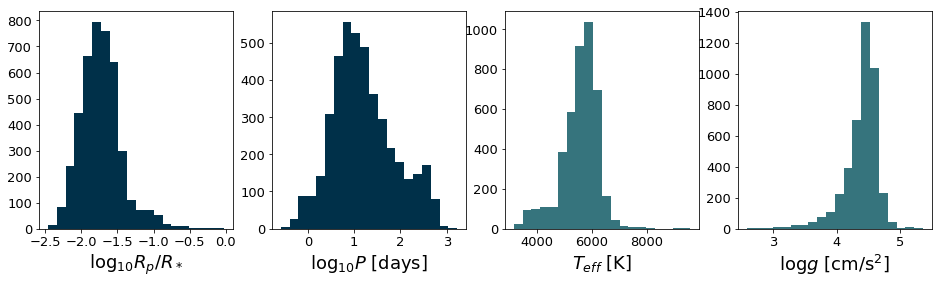

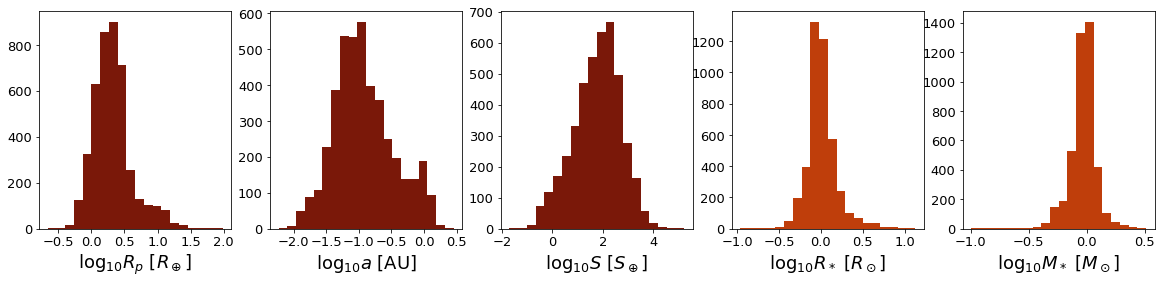

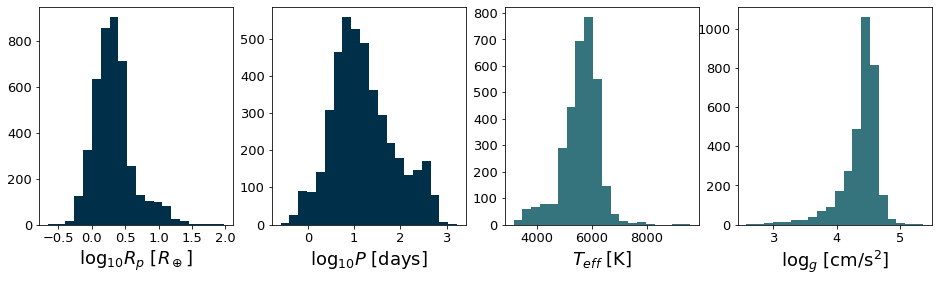

In [15]:
obs_labels = [r'$\log_{10}R_p/R_*$',r'$\log_{10}P$ [days]',r'$T_{eff}$ [K]',r'$\log{g}\ [\mathrm{cm}/\mathrm{s}^2]$']
obs_features = np.vstack((np.log10(np.array(KOIs['koi_ror'])).T,np.log10(np.array(KOIs['koi_period'])).T,np.array(KOIs['koi_steff']).T,np.array(KOIs['koi_slogg']).T)).T
mod_labels = [r'$\log_{10}R_p\ [R_\oplus]$',r'$\log_{10}a$ [AU]',r'$\log_{10}S\ [S_\oplus]$',r'$\log_{10}R_*\ [R_\odot]$',r'$\log_{10}M_*\ [M_\odot]$']
mod_features = np.vstack((np.log10(np.array(KOIs['koi_prad'])).T,np.log10(np.array(KOIs['koi_sma'])).T,np.log10(np.array(KOIs['koi_insol'])).T,np.log10(np.array(KOIs['koi_srad'])).T,np.log10(np.array(KOIs['koi_smass'])).T)).T

final_labels = [r'$\log_{10}R_p\ [R_\oplus]$',r'$\log_{10}P$ [days]',r'$T_{eff}$ [K]',r'$\log_{g}\ [\mathrm{cm}/\mathrm{s}^2]$']
final_features = np.vstack((np.log10(np.array(KOIs['koi_prad'])).T,np.log10(np.array(KOIs['koi_period'])).T,np.array(KOIs['koi_steff']).T,np.array(KOIs['koi_slogg']).T)).T


# observed features
fig, axes = plt.subplots(1,4,figsize=(16,4))
for i in range(2):
    axes[i].hist(obs_features[:,i],bins=20,color='#003049',alpha=1)
    axes[i].set_xlabel(obs_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
        
for i in range(2,4):
    axes[i].hist(obs_features[:,i],bins=20,color='#36747d',alpha=1)
    axes[i].set_xlabel(obs_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
#plt.show()
plt.savefig("./obsFeaturesHist_incJ.pdf",fmt="pdf",bbox_inches="tight")

# modeled features
fig, axes = plt.subplots(1,5,figsize=(20,4))
for i in range(3):
    axes[i].hist(mod_features[:,i],bins=20,color='#7a1809',alpha=1)
    axes[i].set_xlabel(mod_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
        
for i in range(3,5):
    axes[i].hist(mod_features[:,i],bins=20,color='#bf3e0b',alpha=1)
    axes[i].set_xlabel(mod_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
#plt.show()
plt.savefig("./modFeaturesHist_incJ.pdf",fmt="pdf",bbox_inches="tight")


# final features
fig, axes = plt.subplots(1,4,figsize=(16,4))
for i in range(2):
    axes[i].hist(final_features[:,i],bins=20,color='#003049',alpha=1)
    axes[i].set_xlabel(final_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
        


unique_IDs, unique_idxs = np.unique(np.array(KOIs['kepid']),return_index=True)
print(len(final_features[:,2]))
print(len(final_features[:,2][unique_idxs]))

for i in range(2,4):
    axes[i].hist(final_features[:,i][unique_idxs],bins=20,color='#36747d',alpha=1)
    axes[i].set_xlabel(final_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
#plt.show()
plt.savefig("./finalFeaturesHist_incJ.pdf",fmt="pdf",bbox_inches="tight")


## Want these in a format:
### each row = 1 planetary system, i.e. a list of "planets"
### each "planet" = an array of [Rp/Rstar, P, Teff, logg, Fe/H]

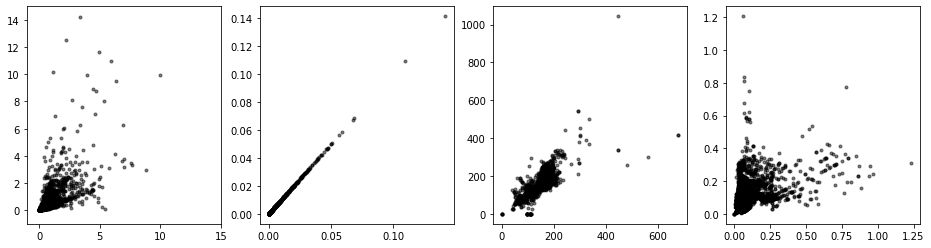

In [16]:
#look at the symmetry on the error bars of the features of interest
fig, axes = plt.subplots(1,4,figsize=(16,4))

axes[0].plot(np.array(KOIs['koi_prad_err1']),-1*np.array(KOIs['koi_prad_err2']),'k.',ls='None',alpha=0.5)
axes[0].set_xlim(-1,15)
axes[0].set_ylim(-1,15)
axes[1].plot(np.array(KOIs['koi_period_err1']),-1*np.array(KOIs['koi_period_err2']),'k.',ls='None',alpha=0.5)
axes[2].plot(np.array(KOIs['koi_steff_err1']),-1*np.array(KOIs['koi_steff_err2']),'k.',ls='None',alpha=0.5)
axes[3].plot(np.array(KOIs['koi_slogg_err1']),-1*np.array(KOIs['koi_slogg_err2']),'k.',ls='None',alpha=0.5)
plt.show()

#so they're not all symmetrical---either draw from a Gaussian centered on the reported value with 
#stdev = max of the two errors, or use a split normal. Gaussian is easier. 

In [17]:
obs_features = np.vstack((np.log10(np.array(KOIs['koi_ror'])).T,np.log10(np.array(KOIs['koi_period'])).T,np.array(KOIs['koi_steff']).T,np.array(KOIs['koi_slogg']).T)).T
mod_features = np.vstack((np.log10(np.array(KOIs['koi_prad'])).T,np.log10(np.array(KOIs['koi_sma'])).T,np.log10(np.array(KOIs['koi_insol'])).T,np.log10(np.array(KOIs['koi_srad'])).T,np.log10(np.array(KOIs['koi_smass'])).T)).T
final_features = np.vstack((np.log10(np.array(KOIs['koi_prad'])).T,np.log10(np.array(KOIs['koi_period'])).T,np.array(KOIs['koi_steff']).T,np.array(KOIs['koi_slogg']).T)).T

print(np.shape(obs_features))
print(np.shape(mod_features))
print(np.shape(final_features))

(4286, 4)
(4286, 5)
(4286, 4)


In [18]:
print(np.shape(final_features))

(4286, 4)


In [22]:
n_draws=100
final_features_with_unc = np.zeros((np.shape(final_features)[0],np.shape(final_features)[1],n_draws))

#just to make histogram in next cell easier
#final_features_with_unc = np.zeros((np.shape(final_features)[0]*n_draws,np.shape(final_features)[1]))

print(np.shape(final_features_with_unc))

for i in range(np.shape(final_features_with_unc)[0]):
    print(i)
    #for i in range(np.shape(final_features)[0]):
    for j in range(np.shape(final_features_with_unc)[1]):
        if j == 0:
            mu = np.array(KOIs['koi_prad'])[i]
            sigma1 = np.abs(np.array(KOIs['koi_prad_err1'])[i])
            sigma2 = np.abs(np.array(KOIs['koi_prad_err2'])[i])
        elif j == 1:
            mu = np.array(KOIs['koi_period'])[i]
            sigma1 = np.abs(np.array(KOIs['koi_period_err1'])[i])
            sigma2 = np.abs(np.array(KOIs['koi_period_err2'])[i])
        elif j == 2:
            mu = np.array(KOIs['koi_steff'])[i]
            sigma1 = np.abs(np.array(KOIs['koi_steff_err1'])[i])
            sigma2 = np.abs(np.array(KOIs['koi_steff_err2'])[i])
        elif j == 3:
            mu = np.array(KOIs['koi_slogg'])[i]
            sigma1 = np.abs(np.array(KOIs['koi_slogg_err1'])[i])
            sigma2 = np.abs(np.array(KOIs['koi_slogg_err2'])[i])
        
        sigma = np.max(np.array((np.abs(sigma1),np.abs(sigma2))))
        draws = np.random.normal(loc=mu,scale=sigma,size=n_draws) 
        if j < 2:
            
            while np.any(draws < 0):
                #print('trying again')
                draws[draws < 0] = np.random.normal(loc=mu,scale=sigma,size=len(draws[draws < 0]))
                #draws = np.random.normal(loc=mu,scale=sigma,size=n_draws) 

        final_features_with_unc[i,j,:] = draws
        
final_features_with_unc[:,0,:] = np.log10(final_features_with_unc[:,0,:])
final_features_with_unc[:,1,:] = np.log10(final_features_with_unc[:,1,:])

print((final_features_with_unc[:,0,:]))
print(len(final_features_with_unc[np.isnan(final_features_with_unc)]))

(4286, 4, 100)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273

2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418


4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
[[ 0.41917302  0.30119951  0.3781804  ...  0.32963142  0.41788942
   0.46588405]
 [ 0.54317451  0.48069127  0.39393607 ...  0.38045518  0.45962489
   0.51045386]
 [ 1.21162047  1.09216237  1.23448391 ...  1.25988491  1.20335311
   1.01890594]
 ...
 [ 0.4577977   0.46723566  0.6698439  ...  0.69432975  0.59665511
   0.6963418 ]
 [-0.46377852 -0.16515308 -0.23066074 ... -0.12213753  0.08800323
  -0.0137228 ]
 [ 1.35485132  1.37240759

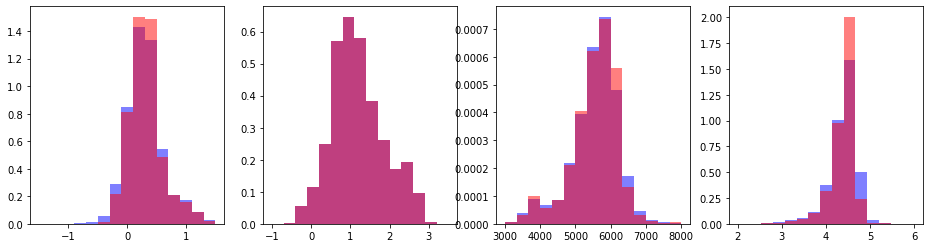

In [32]:
ranges=[(-1.5,1.5),(-1,3.5),(3000,8000),(2,6)]
fig,axes = plt.subplots(1,4,figsize=(16,4))
for i in range(4):
    axes[i].hist(final_features_with_unc[:,i],bins=15,range=ranges[i],color='b',density=True,alpha=0.5)
    axes[i].hist(final_features[:,i],bins=15,range=ranges[i],color='r',density=True,alpha=0.5)
plt.show()

In [23]:
print(np.mean(final_features_with_unc,axis=(0,2)))
print(np.mean(final_features,axis=0))

[3.09018260e-01 1.19926868e+00 5.55205755e+03 4.38436463e+00]
[3.22931699e-01 1.19926865e+00 5.55206393e+03 4.38441507e+00]


In [24]:
print(np.mean(final_features_with_unc,axis=(0,2)))
print(np.std(final_features_with_unc,axis=(0,2)))


[3.09018260e-01 1.19926868e+00 5.55205755e+03 4.38436463e+00]
[3.23225253e-01 6.75679251e-01 6.89930633e+02 3.36770684e-01]


In [25]:
systems = []

idxs = np.arange(len(KOIs['kepid']))
kepids = np.array(KOIs['kepid'])
unique_kepid = np.sort(np.unique(np.array(KOIs['kepid'])))
print(len(unique_kepid))

np.random.seed(42)
unique_kepid_shuffle = np.random.permutation(unique_kepid)

unique_kepid_70 = np.sort(unique_kepid_shuffle[:int(0.7*len(unique_kepid_shuffle))])
unique_kepid_30 = np.sort(unique_kepid_shuffle[int(0.7*len(unique_kepid_shuffle)):])

print(len(unique_kepid_70))
print(len(unique_kepid_30))

kepids_toloop = unique_kepid_70
features = final_features_with_unc
means = np.mean(final_features_with_unc,axis=(0,2))
sigmas = np.std(final_features_with_unc,axis=(0,2))
savename = "../planettagger_regression/realPlanets_incJ_100xtrainingset/realKOIs_finalFeatures_incJ_100xtrainingset_70percent.txt"

for ID in kepids_toloop:
    goodSystem = True
    
    for d in range(n_draws):
        system = [ID]
        thisSystem_mask = (kepids == ID)
        thisSystem_idxs = idxs[thisSystem_mask]

        kepNames = KOIs['kepoi_name'][thisSystem_idxs]
        Ps = KOIs['koi_period'][thisSystem_idxs]
        #sort KOIs from inner to outer
        sort = np.argsort(Ps)
        thisSystem_idxs = thisSystem_idxs[sort]

        count = KOIs['koi_count'][thisSystem_idxs[0]]

        for j in range(1,count+1):
            planet = []

            for k in range(0,np.shape(final_features_with_unc)[1]):
                planet.append( ((final_features_with_unc[:,k,d][thisSystem_idxs[j-1]]) - means[k])/sigmas[k] )

            system.append((planet))

        systems.append(system)

print(len(systems))

print(type(systems))
print(type(systems[0]))
print(type(systems[0][0]))

with open(savename, "wb") as picklefile:
    pickle.dump(systems, picklefile)

3277
2293
984
229300
<class 'list'>
<class 'list'>
<class 'numpy.int64'>


In [26]:
with open(savename, "rb") as picklefile:
    systest = pickle.load(picklefile)

print(len(systest))
print(type(systest))
print(type(systest[0]))
print(type(systest[0][0]))
print(systest[0:2])
print(systems[0:2])

229300
<class 'list'>
<class 'list'>
<class 'numpy.int64'>
[[757450, [2.2034014680424594, -0.3709082640798968, -0.21788396771615812, 0.1563911433764522]], [757450, [2.2473175227645683, -0.3709082085965698, -0.41700604805333924, 0.3228122756492652]]]
[[757450, [2.2034014680424594, -0.3709082640798968, -0.21788396771615812, 0.1563911433764522]], [757450, [2.2473175227645683, -0.3709082085965698, -0.41700604805333924, 0.3228122756492652]]]


In [11]:
984+2293

3277